# Pandas

## Instalación e importación

In [1]:
! pip install pandas

  Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [1]:
import pandas as pd
import numpy as np

## Introducción a Pandas y estructuras de datos básicas

#### Pandas y SQL

- Pandas proporciona una API (interfaz de programación de aplicaciones) más rica para el análisis de datos en comparación con el SQL estándar, incluyendo operaciones complejas de limpieza y transformación de datos que no son directas suelen ser complejas en SQL.

- Pandas y SQL pueden trabajar juntos eficientemente: Pandas puede conectar a bases de datos SQL, leer datos directamente en DataFrames y realizar análisis y transformaciones complejas en Python. Al mismo tiempo, los resultados de los análisis de Pandas pueden almacenarse de nuevo en una base de datos SQL. Esto combina la potencia de SQL en la gestión de bases de datos con la flexibilidad y las capacidades de análisis de Pandas.

#### Estructuras de datos principales

- Series (unidimensional): Puede contener cualquer tipo de datos. Cada elemento se asocia con un indice
- DataFrames (bidimensional): Son tablas con filas y columnas. Similar a una spreedsheet o una tabla SQL. Estructura principal en Pandas

#### Series

In [6]:
data = np.random.randint(low=1, high=100, size=25)
index = ["I" + str(i) for i in range(1, len(data)+1)] # Sino armo el indice lo creará por default desde "0" (cero) hasta el último número
serie1 = pd.Series(data=data, 
                   index=index
                   )
serie1

I1     62
I2     40
I3     82
I4     85
I5     21
I6     42
I7     29
I8     92
I9     61
I10    56
I11    17
I12    80
I13    14
I14    42
I15    11
I16    78
I17    34
I18    37
I19    66
I20     6
I21    82
I22    76
I23    65
I24    91
I25    97
dtype: int64

In [7]:
serie1["I3"] # Consulto por el indice "I3"

np.int64(82)

In [9]:
serie1.iloc[2] # Equivalente pero usando indexación como en listas

np.int64(82)

#### DataFrames

##### Formula para armar un DataFrame:

- df = pd.DataFrame(data, index=index, columns=columns)
- data: puede ser una lista de listas/diccionarios, diccionario de listas, un array de NumPy, una Serie de Pandas, o incluso otro DataFrame
- index: es una lista de etiquetas para las filas. Es opcional.
- columns: es una lista de etiquetas para las columnas. Es opcional. Puede ser pasado en la data si se arma por ejemplo un diccionario de listas con claves

In [15]:
datos = {
    "Mes": ["Enero", "Febrero", "Marzo", "Abril"],
    "Madrid": [10, 12, 15, 17],
    "Barcelona": [14, 16, 18, 20],
    "Bilbao": [8, 10, 12, 14]
}

df_clima = pd.DataFrame(datos)
df_clima # Contiene las temperaturas promedio en grados celciums

,Mes,Madrid,Barcelona,Bilbao
0,Enero,10,14,8
1,Febrero,12,16,10
2,Marzo,15,18,12
3,Abril,17,20,14


## Importación y exportación de datos con Pandas

- Pandas nos permite importar desde y exportar hacia una multiplicidad de formatos entre los que se detacan:
  - .csv
  - .xlsx
  - .json
  - .sql
  - .parquet

##### Estructura basica de lectura de datos desde .csv

- pd.read_csv('file.csv', usecols=['column1', 'column2'], parse_dates=['date_column'])
- 'file.csv': es la ruta al archivo CSV que deseas leer.
- usecols: es un parámetro opcional que permite especificar una lista de columnas para leer, lo cual es útil para reducir el consumo de memoria al leer archivos grandes al cargar solo las columnas necesarias.
- parse_dates: es un parámetro opcional que indica a Pandas que intente interpretar una o más columnas como fechas y convierta las cadenas en objetos datetime.

In [10]:
# Lectura de archivos de temperaturas y precipitaciones
temperaturas_df = pd.read_csv("temperaturas_globales.csv", parse_dates=['Fecha'])
temperaturas_df
# clase 5/temperaturas_globales.csv
# clase 5/temperaturas_globales.csv

,Fecha,Nueva York,París,Berlín,Londres,Madrid
0,2022-01-31,2,6,22,24,23
1,2022-02-28,26,29,18,10,21
2,2022-03-31,20,3,14,2,-4
3,2022-04-30,32,-4,26,31,33
4,2022-05-31,18,0,33,1,26
5,2022-06-30,11,14,8,25,-3
6,2022-07-31,8,5,0,22,22
7,2022-08-31,3,22,7,15,22
8,2022-09-30,3,10,17,19,19
9,2022-10-31,28,31,9,11,-5


In [11]:
precipitaciones_df = pd.read_csv("precipitaciones_globales.csv", parse_dates=["Fecha"])
precipitaciones_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid
0,2022-01-31,63,78,33,99,82
1,2022-02-28,78,34,76,57,86
2,2022-03-31,35,23,74,52,58
3,2022-04-30,33,75,90,88,65
4,2022-05-31,80,81,85,49,49
5,2022-06-30,83,80,91,83,87
6,2022-07-31,39,76,66,68,21
7,2022-08-31,58,92,84,81,92
8,2022-09-30,46,31,43,33,47
9,2022-10-31,67,87,56,28,82


In [12]:
precipitaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       24 non-null     datetime64[ns]
 1   Nueva York  24 non-null     int64         
 2   París       24 non-null     int64         
 3   Berlín      24 non-null     int64         
 4   Londres     24 non-null     int64         
 5   Madrid      24 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.3 KB


In [13]:
precipitaciones_df_nueva_york = pd.read_csv("precipitaciones_globales.csv", parse_dates=["Fecha"], usecols=["Fecha", "Nueva York"])
precipitaciones_df_nueva_york

,Fecha,Nueva York
0,2022-01-31,63
1,2022-02-28,78
2,2022-03-31,35
3,2022-04-30,33
4,2022-05-31,80
5,2022-06-30,83
6,2022-07-31,39
7,2022-08-31,58
8,2022-09-30,46
9,2022-10-31,67


##### Leer datos desde un motor como PostgreSQL

In [23]:
! pip install sqlalchemy psycopg2 

  Using cached psycopg2-2.9.9-cp311-cp311-macosx_11_0_arm64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:0000:0100:01


In [25]:
! pip install python-dotenv


  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)


In [26]:
! pip freeze > requirements.txt

In [16]:
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Obtener las variables de entorno
password = os.getenv("DB_PASSWORD")

# Configuración de la conexión
user = "mgobea"
password = password # Reemplazar con el password de tu motor local
host = "localhost"
port = "5432"
database = "henry"

# Crear la URI de conexión
connection_uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Crear el motor de conexión
engine = create_engine(connection_uri)

# Leer la tabla clase_5 en un DataFrame de Pandas
df = pd.read_sql_table("clase_5", engine)

# Mostrar el DataFrame
df


,id,nombre,edad,ciudad,salario,fecha_ingreso
0,1,Nombre1,48,Ciudad6,5643.76,2024-05-13
1,2,Nombre2,39,Ciudad3,3880.31,2024-01-20
2,3,Nombre3,49,Ciudad4,6305.49,2023-08-30
3,4,Nombre4,30,Ciudad4,6864.53,2023-07-31
4,5,Nombre5,54,Ciudad3,6044.84,2024-06-02
5,6,Nombre6,41,Ciudad8,5000.12,2024-01-29
6,7,Nombre7,24,Ciudad4,4663.07,2023-12-20
7,8,Nombre8,63,Ciudad4,3922.77,2024-01-08
8,9,Nombre9,64,Ciudad2,5370.83,2023-07-29
9,10,Nombre10,31,Ciudad1,3449.89,2024-06-07


##### Exportación de dataframe. Ejemplo a CSV el que me traje desde mi motor

In [30]:
df.to_csv("tabla_motor.csv", index=False, encoding='utf-8') # El encoding es util al trabajar con variables en español por ejemplo. Por las ñ y demás signos que no están en el ingles

In [17]:
df.to_json("tabla_motor.json")

## Manipulación de Series y DataFrames

- Selección de columna: columna_a = df['A']
- Selección de múltiples columnas: subconjunto = df[['A', 'B']]
- Selección de filas por su indice: Ej: fila = df.loc['index_label']
- Selección de filas por posición de índice: fila = df.iloc[0]
- Filtrar filas por condiciones: df_filtrado = df[df['A'] > 10]

In [21]:
# Filtramos para obtener solo las filas donde la temperatura en Madrid fue mayor a 25 grados
meses_calurosos_madrid = temperaturas_df[temperaturas_df['Madrid'] > 25]
meses_calurosos_madrid

,Fecha,Nueva York,París,Berlín,Londres,Madrid
3,2022-04-30,32,-4,26,31,33
4,2022-05-31,18,0,33,1,26
12,2023-01-31,25,-2,11,34,30


In [22]:
# Mostramos el resultado
print("Meses con temperaturas mayores a 25 grados en Madrid:")
subset = meses_calurosos_madrid[['Fecha', 'Madrid']]
subset

Meses con temperaturas mayores a 25 grados en Madrid:


,Fecha,Madrid
3,2022-04-30,33
4,2022-05-31,26
12,2023-01-31,30


In [25]:
subset["Madrid"] = subset["Madrid"] + 2
subset

/var/folders/92/ll_bsj3s7cjd31xcdq78rqbd4_fd9g/T/ipykernel_41396/1609959782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Madrid"] = subset["Madrid"] + 2


,Fecha,Madrid
3,2022-04-30,35
4,2022-05-31,28
12,2023-01-31,32


#### Operaciones aritméticas

In [18]:
serie1

I1     62
I2     40
I3     82
I4     85
I5     21
I6     42
I7     29
I8     92
I9     61
I10    56
I11    17
I12    80
I13    14
I14    42
I15    11
I16    78
I17    34
I18    37
I19    66
I20     6
I21    82
I22    76
I23    65
I24    91
I25    97
dtype: int64

In [19]:
serie1 + 10 # Sumo 10 a cada elemento de una serie

I1      72
I2      50
I3      92
I4      95
I5      31
I6      52
I7      39
I8     102
I9      71
I10     66
I11     27
I12     90
I13     24
I14     52
I15     21
I16     88
I17     44
I18     47
I19     76
I20     16
I21     92
I22     86
I23     75
I24    101
I25    107
dtype: int64

In [37]:
serie1 * 2 # Multiplico por 2 la serie1

I1      70
I2      28
I3      22
I4     192
I5     164
I6      34
I7     112
I8     144
I9     148
I10     44
I11    166
I12    134
I13    154
I14    122
I15     42
I16     64
I17     60
I18     74
I19    148
I20    196
I21    172
I22    162
I23    140
I24     50
I25    100
dtype: int64

#### Operaciones estadísticas


In [39]:
berlin_temp = temperaturas_df["Berlín"]
print(f'Promedio de temp en Berlin {berlin_temp.mean()}')
print(f'Mediana de temp en Berlín: {berlin_temp.median()}')
print(f'Desviación Estándar de la Temperatura en Berlín: {berlin_temp.std()}')

Promedio de temp en Berlin 13.583333333333334
Mediana de temp en Berlín: 12.5
Desviación Estándar de la Temperatura en Berlín: 10.375207349071722


#### Cambio de tipos de datos

- .astype()
- to_datetime()

In [26]:
temperaturas_df['París']

0      6
1     29
2      3
3     -4
4      0
5     14
6      5
7     22
8     10
9     31
10    30
11    26
12    -2
13    -3
14    20
15     7
16    29
17    31
18    29
19     2
20    32
21    33
22    19
23     6
Name: París, dtype: int64

In [30]:
paris_temps = temperaturas_df['París'].astype(float)
paris_temps

0      6.0
1     29.0
2      3.0
3     -4.0
4      0.0
5     14.0
6      5.0
7     22.0
8     10.0
9     31.0
10    30.0
11    26.0
12    -2.0
13    -3.0
14    20.0
15     7.0
16    29.0
17    31.0
18    29.0
19     2.0
20    32.0
21    33.0
22    19.0
23     6.0
Name: París, dtype: float64

In [29]:
temperaturas_df['París'].astype("object")

0      6
1     29
2      3
3     -4
4      0
5     14
6      5
7     22
8     10
9     31
10    30
11    26
12    -2
13    -3
14    20
15     7
16    29
17    31
18    29
19     2
20    32
21    33
22    19
23     6
Name: París, dtype: object

In [31]:
temperaturas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       24 non-null     datetime64[ns]
 1   Nueva York  24 non-null     int64         
 2   París       24 non-null     int64         
 3   Berlín      24 non-null     int64         
 4   Londres     24 non-null     int64         
 5   Madrid      24 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.3 KB


In [35]:
temperaturas_df["Fecha"] = temperaturas_df["Fecha"].astype("datetime64[ns]")
temperaturas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       24 non-null     datetime64[ns]
 1   Nueva York  24 non-null     int64         
 2   París       24 non-null     int64         
 3   Berlín      24 non-null     int64         
 4   Londres     24 non-null     int64         
 5   Madrid      24 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.3 KB


In [37]:
temperaturas_df["Fecha"].dt.year

0     2022
1     2022
2     2022
3     2022
4     2022
5     2022
6     2022
7     2022
8     2022
9     2022
10    2022
11    2022
12    2023
13    2023
14    2023
15    2023
16    2023
17    2023
18    2023
19    2023
20    2023
21    2023
22    2023
23    2023
Name: Fecha, dtype: int32

In [38]:
# temperaturas_df["Fecha"] = temperaturas_df["Fecha"].astype("datetime64[ns]")
temperaturas_df["Fecha"] = pd.to_datetime(temperaturas_df["Fecha"])
temperaturas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       24 non-null     datetime64[ns]
 1   Nueva York  24 non-null     int64         
 2   París       24 non-null     int64         
 3   Berlín      24 non-null     int64         
 4   Londres     24 non-null     int64         
 5   Madrid      24 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.3 KB


#### Conteo de valores únicos


In [49]:
temperaturas_df["Berlín"].value_counts() # Frecuencia de veces que se repite cada valor

Berlín
 2     3
 9     2
 17    2
 18    2
 34    1
 12    1
 13    1
-3     1
 19    1
 11    1
 22    1
 31    1
 7     1
 0     1
 8     1
 33    1
 26    1
 14    1
 5     1
Name: count, dtype: int64

In [40]:
temperaturas_df["Berlín"].value_counts(normalize=True) * 100# Porcentaje

Berlín
 2     12.500000
 9      8.333333
 17     8.333333
 18     8.333333
 34     4.166667
 12     4.166667
 13     4.166667
-3      4.166667
 19     4.166667
 11     4.166667
 22     4.166667
 31     4.166667
 7      4.166667
 0      4.166667
 8      4.166667
 33     4.166667
 26     4.166667
 14     4.166667
 5      4.166667
Name: proportion, dtype: float64

#### Estadísticas descriptivas de mi dataset

In [45]:
df_estadistica = temperaturas_df.describe()
df_estadistica

,Fecha,Nueva York,París,Berlín,Londres,Madrid
count,24,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2023-01-14 10:00:00,16.583333,15.625000,13.583333,15.208333,14.708333
min,2022-01-31 00:00:00,-5.000000,-4.000000,-3.000000,-2.000000,-5.000000
25%,2022-07-23 06:00:00,7.750000,4.500000,6.500000,5.250000,5.000000
50%,2023-01-15 12:00:00,19.000000,16.500000,12.500000,14.500000,19.500000
75%,2023-07-07 18:00:00,25.250000,29.000000,18.250000,24.250000,23.000000
max,2023-12-31 00:00:00,33.000000,33.000000,34.000000,34.000000,33.000000
std,NaN,10.934257,13.193584,10.375207,11.784216,11.437844


In [49]:
! pip install openpyxl

  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.6 MB/s eta 0:00:00
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [47]:
df_estadistica.to_csv("estadisticos_descriptivos_temperaturas.csv", index=False)

In [50]:
df_estadistica.to_excel("estadisticos_descriptivos_temperaturas.xlsx", index=False)

#### Categorización de variable númerica - Una opción. Hay muchas...

In [48]:
bins = [0, 10, 20, 30, 40]
labels = ['Bajo', 'Moderado', 'Alto', 'Muy Alto']
temperaturas_df['Categoría_Madrid'] = pd.cut(x=temperaturas_df['Madrid'], 
                                             bins=bins, 
                                             labels=labels, 
                                             right=False)
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid
0,2022-01-31,2,6,22,24,23,Alto
1,2022-02-28,26,29,18,10,21,Alto
2,2022-03-31,20,3,14,2,-4,NaN
3,2022-04-30,32,-4,26,31,33,Muy Alto
4,2022-05-31,18,0,33,1,26,Alto
5,2022-06-30,11,14,8,25,-3,NaN
6,2022-07-31,8,5,0,22,22,Alto
7,2022-08-31,3,22,7,15,22,Alto
8,2022-09-30,3,10,17,19,19,Moderado
9,2022-10-31,28,31,9,11,-5,NaN


In [54]:
# .info() información muy útil para trabajar con el dataframe
temperaturas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             24 non-null     datetime64[ns]
 1   Nueva York        24 non-null     int64         
 2   París             24 non-null     int64         
 3   Berlín            24 non-null     int64         
 4   Londres           24 non-null     int64         
 5   Madrid            24 non-null     int64         
 6   Categoría_Madrid  20 non-null     category      
dtypes: category(1), datetime64[ns](1), int64(5)
memory usage: 1.5 KB


#### head(), tail(), sample()
- head(): primeras rows.
- tail(): últimas rows.
- sample(): muestra aleatoria. 

In [51]:
temperaturas_df.head(10)

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid
0,2022-01-31,2,6,22,24,23,Alto
1,2022-02-28,26,29,18,10,21,Alto
2,2022-03-31,20,3,14,2,-4,NaN
3,2022-04-30,32,-4,26,31,33,Muy Alto
4,2022-05-31,18,0,33,1,26,Alto
5,2022-06-30,11,14,8,25,-3,NaN
6,2022-07-31,8,5,0,22,22,Alto
7,2022-08-31,3,22,7,15,22,Alto
8,2022-09-30,3,10,17,19,19,Moderado
9,2022-10-31,28,31,9,11,-5,NaN


In [53]:
temperaturas_df.tail(8)

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid
16,2023-05-31,19,29,13,34,3,Bajo
17,2023-06-30,8,31,17,9,-2,NaN
18,2023-07-31,6,29,12,6,5,Bajo
19,2023-08-31,24,2,18,14,6,Bajo
20,2023-09-30,28,32,34,3,16,Moderado
21,2023-10-31,21,33,5,2,12,Moderado
22,2023-11-30,33,19,2,33,23,Alto
23,2023-12-31,32,6,2,19,25,Alto


In [57]:
temperaturas_df.sample(10)

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid
20,2023-09-30,28,32,34,3,16,Moderado
10,2022-11-30,20,30,31,-1,23,Alto
11,2022-12-31,7,26,2,7,22,Alto
17,2023-06-30,8,31,17,9,-2,NaN
16,2023-05-31,19,29,13,34,3,Bajo
4,2022-05-31,18,0,33,1,26,Alto
0,2022-01-31,2,6,22,24,23,Alto
9,2022-10-31,28,31,9,11,-5,NaN
8,2022-09-30,3,10,17,19,19,Moderado
13,2023-02-28,-5,-3,9,28,20,Alto


#### Manejo de datos faltantes: 

- Nativo de pandas: isna() para contar faltantes
- Nativo de pandas: dropna() para eliminar faltantes
- Nativo de pandas: fillna() para reemplazar faltantes por lo que consideremos
- **missing-mga**: package a importar que extiende pandas y nos permite más de 25 métodos para trabajar con faltantes de manera profesional (Creado por mí y disponible para toda la comunidad)

In [58]:
! pip install missing-mga

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached UpSetPlot-0.9.0-py3-none-any.whl
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 43.6 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [59]:
! pip freeze > requirement.txt

#### Creación de columnas. En este caso rellenas de nulos

In [59]:
temperaturas_df["faltantes1"] = pd.NA # Nulo de Pandas
temperaturas_df["faltantes2"] = np.nan # Nulo de Numpy
temperaturas_df["faltantes3"] = None # Nulo de Python nativo
temperaturas_df.head()

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None


In [63]:
temperaturas_df.isna() # Identifico con True los valores faltantes o missing values

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,True,True,True,True
6,False,False,False,False,False,False,False,True,True,True
7,False,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,True,True,True
9,False,False,False,False,False,False,True,True,True,True


In [60]:
temperaturas_df.isna().sum() # Los cuento por columna

Fecha                0
Nueva York           0
París                0
Berlín               0
Londres              0
Madrid               0
Categoría_Madrid     4
faltantes1          24
faltantes2          24
faltantes3          24
dtype: int64

In [61]:
temperaturas_df.isna().sum().sum() # Los sumo en total

np.int64(76)

In [62]:
# Plus+: Algunos métodos de mi package missing-mga: Documentación acá: https://pypi.org/project/missing-mga/
import missing_mga as missing

temperaturas_df.missing.number_missing()

np.int64(76)

In [67]:
# Busco la cantidad de faltantes por fila en lugar de por columna:
temperaturas_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,3,30.0
1,1,3,30.0
2,2,4,40.0
3,3,3,30.0
4,4,3,30.0
5,5,4,40.0
6,6,3,30.0
7,7,3,30.0
8,8,3,30.0
9,9,4,40.0


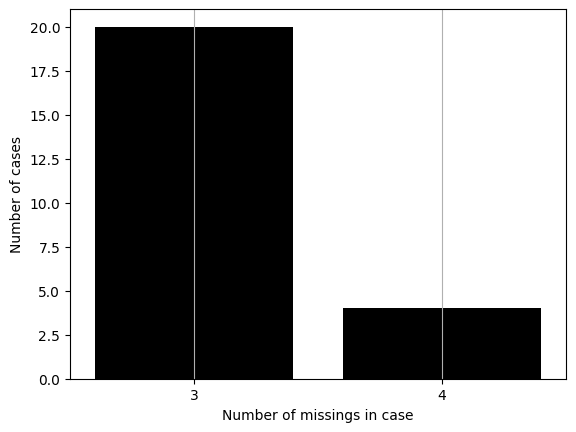

In [69]:
# Gráfico los valores faltantes de cada fila
temperaturas_df.missing.missing_case_plot() # 20 filas con 3 faltantes y 3 filas con 4 faltantes

In [69]:
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None
5,2022-06-30,11,14,8,25,-3,NaN,<NA>,NaN,None
6,2022-07-31,8,5,0,22,22,Alto,<NA>,NaN,None
7,2022-08-31,3,22,7,15,22,Alto,<NA>,NaN,None
8,2022-09-30,3,10,17,19,19,Moderado,<NA>,NaN,None
9,2022-10-31,28,31,9,11,-5,NaN,<NA>,NaN,None


In [71]:
temperaturas_df_sin_nulos = temperaturas_df.dropna(axis=1) # Elimino las columnas que tienen nulos
temperaturas_df_sin_nulos

,Fecha,Nueva York,París,Berlín,Londres,Madrid
0,2022-01-31,2,6,22,24,23
1,2022-02-28,26,29,18,10,21
2,2022-03-31,20,3,14,2,-4
3,2022-04-30,32,-4,26,31,33
4,2022-05-31,18,0,33,1,26
5,2022-06-30,11,14,8,25,-3
6,2022-07-31,8,5,0,22,22
7,2022-08-31,3,22,7,15,22
8,2022-09-30,3,10,17,19,19
9,2022-10-31,28,31,9,11,-5


In [76]:
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None
5,2022-06-30,11,14,8,25,-3,NaN,<NA>,NaN,None
6,2022-07-31,8,5,0,22,22,Alto,<NA>,NaN,None
7,2022-08-31,3,22,7,15,22,Alto,<NA>,NaN,None
8,2022-09-30,3,10,17,19,19,Moderado,<NA>,NaN,None
9,2022-10-31,28,31,9,11,-5,NaN,<NA>,NaN,None


In [72]:
temperaturas_df = temperaturas_df.astype({
    "Categoría_Madrid": "object",
    "faltantes1": "object",
    "faltantes2": "object",
    "faltantes3": "object"
})
temperaturas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             24 non-null     datetime64[ns]
 1   Nueva York        24 non-null     int64         
 2   París             24 non-null     int64         
 3   Berlín            24 non-null     int64         
 4   Londres           24 non-null     int64         
 5   Madrid            24 non-null     int64         
 6   Categoría_Madrid  20 non-null     object        
 7   faltantes1        0 non-null      object        
 8   faltantes2        0 non-null      object        
 9   faltantes3        0 non-null      object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.0+ KB


In [104]:
temperaturas_df.isna()

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,True,True,True,True
6,False,False,False,False,False,False,False,True,True,True
7,False,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,True,True,True
9,False,False,False,False,False,False,True,True,True,True


In [105]:

temperaturas_df_con_ceros_por_nulos = temperaturas_df.fillna(0) # Elimino las columnas que tienen nulos
temperaturas_df_con_ceros_por_nulos

/var/folders/92/ll_bsj3s7cjd31xcdq78rqbd4_fd9g/T/ipykernel_87897/1340289023.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temperaturas_df_con_ceros_por_nulos = temperaturas_df.fillna(0) # Elimino las columnas que tienen nulos


,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,2022-01-31,2,6,22,24,23,Alto,0,0,0
1,2022-02-28,26,29,18,10,21,Alto,0,0,0
2,2022-03-31,20,3,14,2,-4,0,0,0,0
3,2022-04-30,32,-4,26,31,33,Muy Alto,0,0,0
4,2022-05-31,18,0,33,1,26,Alto,0,0,0
5,2022-06-30,11,14,8,25,-3,0,0,0,0
6,2022-07-31,8,5,0,22,22,Alto,0,0,0
7,2022-08-31,3,22,7,15,22,Alto,0,0,0
8,2022-09-30,3,10,17,19,19,Moderado,0,0,0
9,2022-10-31,28,31,9,11,-5,0,0,0,0


In [106]:
temperaturas_df_con_ceros_por_nulos = temperaturas_df.fillna("Missing") # Elimino las columnas que tienen nulos
temperaturas_df_con_ceros_por_nulos

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3
0,2022-01-31,2,6,22,24,23,Alto,Missing,Missing,Missing
1,2022-02-28,26,29,18,10,21,Alto,Missing,Missing,Missing
2,2022-03-31,20,3,14,2,-4,Missing,Missing,Missing,Missing
3,2022-04-30,32,-4,26,31,33,Muy Alto,Missing,Missing,Missing
4,2022-05-31,18,0,33,1,26,Alto,Missing,Missing,Missing
5,2022-06-30,11,14,8,25,-3,Missing,Missing,Missing,Missing
6,2022-07-31,8,5,0,22,22,Alto,Missing,Missing,Missing
7,2022-08-31,3,22,7,15,22,Alto,Missing,Missing,Missing
8,2022-09-30,3,10,17,19,19,Moderado,Missing,Missing,Missing
9,2022-10-31,28,31,9,11,-5,Missing,Missing,Missing,Missing


#### Más creación de columnas

In [73]:
temperaturas_df["Europa"] = (temperaturas_df["Berlín"] + temperaturas_df.París + temperaturas_df.Londres + temperaturas_df.Madrid) / 4
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3,Europa
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None,18.75
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None,19.50
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None,3.75
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None,21.50
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None,15.00
5,2022-06-30,11,14,8,25,-3,NaN,<NA>,NaN,None,11.00
6,2022-07-31,8,5,0,22,22,Alto,<NA>,NaN,None,12.25
7,2022-08-31,3,22,7,15,22,Alto,<NA>,NaN,None,16.50
8,2022-09-30,3,10,17,19,19,Moderado,<NA>,NaN,None,16.25
9,2022-10-31,28,31,9,11,-5,NaN,<NA>,NaN,None,11.50


#### Uso de apply() y lambda para generar nuevas columnas

In [76]:
def situacion_clima(x):
    if x > 25:
        return "Caluroso"
    elif x >= 15:
        return "Templado"
    else:
        return "Fresco"
    

In [77]:
temperaturas_df["Madrid_Categorical_Lambda2"] = temperaturas_df.Madrid.apply(situacion_clima)
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3,Europa,Madrid_Categorical_Lambda,Madrid_Categorical_Lambda2
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None,18.75,Templado,Templado
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None,19.50,Templado,Templado
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None,3.75,Fresco,Fresco
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None,21.50,Caluroso,Caluroso
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None,15.00,Caluroso,Caluroso
5,2022-06-30,11,14,8,25,-3,NaN,<NA>,NaN,None,11.00,Fresco,Fresco
6,2022-07-31,8,5,0,22,22,Alto,<NA>,NaN,None,12.25,Templado,Templado
7,2022-08-31,3,22,7,15,22,Alto,<NA>,NaN,None,16.50,Templado,Templado
8,2022-09-30,3,10,17,19,19,Moderado,<NA>,NaN,None,16.25,Templado,Templado
9,2022-10-31,28,31,9,11,-5,NaN,<NA>,NaN,None,11.50,Fresco,Fresco


In [74]:
temperaturas_df["Madrid_Categorical_Lambda"] = temperaturas_df.Madrid.apply(lambda x: 'Caluroso' if x > 25 else ('Templado' if x >= 15 else 'Fresco'))
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3,Europa,Madrid_Categorical_Lambda
0,2022-01-31,2,6,22,24,23,Alto,<NA>,NaN,None,18.75,Templado
1,2022-02-28,26,29,18,10,21,Alto,<NA>,NaN,None,19.50,Templado
2,2022-03-31,20,3,14,2,-4,NaN,<NA>,NaN,None,3.75,Fresco
3,2022-04-30,32,-4,26,31,33,Muy Alto,<NA>,NaN,None,21.50,Caluroso
4,2022-05-31,18,0,33,1,26,Alto,<NA>,NaN,None,15.00,Caluroso
5,2022-06-30,11,14,8,25,-3,NaN,<NA>,NaN,None,11.00,Fresco
6,2022-07-31,8,5,0,22,22,Alto,<NA>,NaN,None,12.25,Templado
7,2022-08-31,3,22,7,15,22,Alto,<NA>,NaN,None,16.50,Templado
8,2022-09-30,3,10,17,19,19,Moderado,<NA>,NaN,None,16.25,Templado
9,2022-10-31,28,31,9,11,-5,NaN,<NA>,NaN,None,11.50,Fresco


In [111]:
temperaturas_df["Londres_Ajustado"] = temperaturas_df.Londres.apply(lambda x: x + 2) # Sumo dos grados
temperaturas_df

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3,Europa,Madrid_Categorical_Lambda,Londres_Ajustado
0,2022-01-31,2,6,22,24,23,Alto,NaN,NaN,NaN,18.75,Templado,26
1,2022-02-28,26,29,18,10,21,Alto,NaN,NaN,NaN,19.50,Templado,12
2,2022-03-31,20,3,14,2,-4,NaN,NaN,NaN,NaN,3.75,Fresco,4
3,2022-04-30,32,-4,26,31,33,Muy Alto,NaN,NaN,NaN,21.50,Caluroso,33
4,2022-05-31,18,0,33,1,26,Alto,NaN,NaN,NaN,15.00,Caluroso,3
5,2022-06-30,11,14,8,25,-3,NaN,NaN,NaN,NaN,11.00,Fresco,27
6,2022-07-31,8,5,0,22,22,Alto,NaN,NaN,NaN,12.25,Templado,24
7,2022-08-31,3,22,7,15,22,Alto,NaN,NaN,NaN,16.50,Templado,17
8,2022-09-30,3,10,17,19,19,Moderado,NaN,NaN,NaN,16.25,Templado,21
9,2022-10-31,28,31,9,11,-5,NaN,NaN,NaN,NaN,11.50,Fresco,13


## Técnicas avanzadas de manipulación de datos

#### .groupby()

In [78]:
temperaturas_df["Year"] = temperaturas_df.Fecha.dt.year
temperaturas_df.tail()

,Fecha,Nueva York,París,Berlín,Londres,Madrid,Categoría_Madrid,faltantes1,faltantes2,faltantes3,Europa,Madrid_Categorical_Lambda,Madrid_Categorical_Lambda2,Year
19,2023-08-31,24,2,18,14,6,Bajo,<NA>,NaN,None,10.00,Fresco,Fresco,2023
20,2023-09-30,28,32,34,3,16,Moderado,<NA>,NaN,None,21.25,Templado,Templado,2023
21,2023-10-31,21,33,5,2,12,Moderado,<NA>,NaN,None,13.00,Fresco,Fresco,2023
22,2023-11-30,33,19,2,33,23,Alto,<NA>,NaN,None,19.25,Templado,Templado,2023
23,2023-12-31,32,6,2,19,25,Alto,<NA>,NaN,None,13.00,Templado,Templado,2023


In [79]:
df_group = temperaturas_df.groupby(temperaturas_df["Year"])[["Londres","París","Berlín","Madrid","Nueva York"]].mean()
df_group

,Londres,París,Berlín,Madrid,Nueva York
Year,,,,,
2022,13.833333,14.333333,15.583333,16.583333,14.833333
2023,16.583333,16.916667,11.583333,12.833333,18.333333


#### Métodos posibles a aplicar post agrupamiento:

- .sum(): Suma de valores.
- .mean(): Media aritmética.
- .median(): Mediana.
- .count(): Cuenta el número de valores no nulos.
- .max(): Valor máximo.
- .min(): Valor mínimo.

#### pd.melt(): Despivotizar una tabla agrupada convirtiendo valores de columnas en filas

In [81]:
df_temp = pd.read_csv("temperaturas_globales.csv")
df_temp

,Fecha,Nueva York,París,Berlín,Londres,Madrid
0,2022-01-31,2,6,22,24,23
1,2022-02-28,26,29,18,10,21
2,2022-03-31,20,3,14,2,-4
3,2022-04-30,32,-4,26,31,33
4,2022-05-31,18,0,33,1,26
5,2022-06-30,11,14,8,25,-3
6,2022-07-31,8,5,0,22,22
7,2022-08-31,3,22,7,15,22
8,2022-09-30,3,10,17,19,19
9,2022-10-31,28,31,9,11,-5


In [82]:
df_temp

,Fecha,Nueva York,París,Berlín,Londres,Madrid
0,2022-01-31,2,6,22,24,23
1,2022-02-28,26,29,18,10,21
2,2022-03-31,20,3,14,2,-4
3,2022-04-30,32,-4,26,31,33
4,2022-05-31,18,0,33,1,26
5,2022-06-30,11,14,8,25,-3
6,2022-07-31,8,5,0,22,22
7,2022-08-31,3,22,7,15,22
8,2022-09-30,3,10,17,19,19
9,2022-10-31,28,31,9,11,-5


In [83]:
# Uso de pd.melt()

# Transformar las columnas de ciudades en una sola columna 'Ciudad' y una columna 'Temperatura'

df_temperaturas_nuevoformato = df_temp.melt(id_vars=['Fecha'], var_name='Ciudad', value_name='Temperatura')
df_temperaturas_nuevoformato # Lo cual tiene mucho más sentido para manipular este tipo de información. ¿No? 

,Fecha,Ciudad,Temperatura
0,2022-01-31,Nueva York,2
1,2022-02-28,Nueva York,26
2,2022-03-31,Nueva York,20
3,2022-04-30,Nueva York,32
4,2022-05-31,Nueva York,18
...,...,...,...
115,2023-08-31,Madrid,6
116,2023-09-30,Madrid,16
117,2023-10-31,Madrid,12
118,2023-11-30,Madrid,23


In [131]:
# Uso de filter() para agrupar solo determinadas ciudades
# Definimos un umbral para la desviación estándar de la temperatura
umbral_variabilidad = 11

# Filtramos ciudades con una variabilidad de temperatura superior al umbral
ciudades_con_alta_variabilidad = df_temperaturas_nuevoformato.groupby('Ciudad').filter(lambda x: x['Temperatura'].std() > umbral_variabilidad)

print("Ciudades con alta variabilidad de temperatura:")
print(ciudades_con_alta_variabilidad['Ciudad'].unique())

Ciudades con alta variabilidad de temperatura:
['París' 'Londres' 'Madrid']


In [132]:
ciudades_con_alta_variabilidad

,Fecha,Ciudad,Temperatura
24,2022-01-31,París,6
25,2022-02-28,París,29
26,2022-03-31,París,3
27,2022-04-30,París,-4
28,2022-05-31,París,0
...,...,...,...
115,2023-08-31,Madrid,6
116,2023-09-30,Madrid,16
117,2023-10-31,Madrid,12
118,2023-11-30,Madrid,23


#### Explicación del uso de filter() junto con groupby() y lambda functions
- En este ejemplo, .filter() se usa para aplicar una función lambda a cada grupo. La función calcula la desviación estándar de las temperaturas para cada ciudad y compara este valor con un umbral predefinido. Solo los grupos (ciudades) que cumplen con la condición (variabilidad de temperatura superior al umbral) se mantienen en el DataFrame resultante.

#### Pivot Tables

- Herramienta para resumir, analizar, explorar y presentar tus datos
- En ocasiones puede reemplazar a groupby
- Especialmente útiles para análisis de datos exploratorios y reportes
- Ejemplo: **pivot = df.pivot_table(values='valor', index='fila', columns='columna', aggfunc='mean')**

In [136]:
# Temperatura máxima anual para cada ciudad
# Primero, asegurémonos de que el DataFrame tiene una columna 'Año' extraída de 'Fecha'
df_temperaturas_nuevoformato['Fecha'] = pd.to_datetime(df_temperaturas_nuevoformato['Fecha'])
df_temperaturas_nuevoformato['Año'] = df_temperaturas_nuevoformato['Fecha'].dt.year

# Crear la tabla pivote
tabla_pivote_maximas = df_temperaturas_nuevoformato.pivot_table(values='Temperatura', 
                                                                index='Año', 
                                                                columns='Ciudad', 
                                                                aggfunc='max')

print("Tabla Pivote de Temperaturas Máximas Anuales por Ciudad:")
tabla_pivote_maximas

Tabla Pivote de Temperaturas Máximas Anuales por Ciudad:


Ciudad,Berlín,Londres,Madrid,Nueva York,París
Año,,,,,
2022,33,31,33,32,31
2023,34,34,30,33,33


### Fusión y concatenación de datos

- **pd.merge():** es similar a las operaciones JOIN en SQL y combina filas de dos o más DataFrames basados en una o más claves de coincidencia.
- Ejemplo de pd.merge(): **df_fusionado = pd.merge(df1, df2, on='clave_comun')**
- **pd.concat():** concatena DataFrames o Series a lo largo de un eje particular. Es útil para combinar datos que tienen el mismo esquema.
- Ejemplo de pd.concat(): **pd.concat([df1, df2])**

In [137]:
# Asegurando que los datos estén en el formato correcto

df_temp['Fecha'] = pd.to_datetime(df_temp['Fecha'])
precipitaciones_df['Fecha'] = pd.to_datetime(precipitaciones_df['Fecha'])

In [138]:
# Una vez que ambos están en formato datetime, procedemos con el merge
# Combinar df_temperaturas y df_precipitaciones
df_combinado = pd.merge(df_temp, precipitaciones_df, on='Fecha', suffixes=('_temp', '_prec'))
df_combinado

,Fecha,Nueva York_temp,París_temp,Berlín_temp,Londres_temp,Madrid_temp,Nueva York_prec,París_prec,Berlín_prec,Londres_prec,Madrid_prec
0,2022-01-31,2,6,22,24,23,63,78,33,99,82
1,2022-02-28,26,29,18,10,21,78,34,76,57,86
2,2022-03-31,20,3,14,2,-4,35,23,74,52,58
3,2022-04-30,32,-4,26,31,33,33,75,90,88,65
4,2022-05-31,18,0,33,1,26,80,81,85,49,49
5,2022-06-30,11,14,8,25,-3,83,80,91,83,87
6,2022-07-31,8,5,0,22,22,39,76,66,68,21
7,2022-08-31,3,22,7,15,22,58,92,84,81,92
8,2022-09-30,3,10,17,19,19,46,31,43,33,47
9,2022-10-31,28,31,9,11,-5,67,87,56,28,82


In [140]:
# Datos para el primer DataFrame (2022)
data_2022 = {
    'Fecha': pd.date_range(start="2022-01-01", end="2022-12-31", freq='ME'),
    'Nueva York': [-5, 0, 5, 10, 15, 20, 25, 24, 19, 10, 5, -2],
    'París': [2, 5, 8, 12, 15, 18, 21, 20, 17, 11, 7, 3]
}
df_2022 = pd.DataFrame(data_2022)

# Datos para el segundo DataFrame (2023)
data_2023 = {
    'Fecha': pd.date_range(start="2023-01-01", end="2023-12-31", freq='ME'),
    'Nueva York': [-6, -1, 4, 11, 16, 21, 26, 23, 18, 9, 4, -3],
    'París': [1, 4, 9, 13, 16, 19, 22, 21, 16, 10, 6, 2]
}

df_2023 = pd.DataFrame(data_2023)

In [141]:
# Concatenando los DataFrames verticalmente
df_temperaturas = pd.concat([df_2022, df_2023])

# Reiniciamos el índice del DataFrame resultante para evitar índices duplicados
df_temperaturas.reset_index(drop=True, inplace=True)
df_temperaturas

,Fecha,Nueva York,París
0,2022-01-31,-5,2
1,2022-02-28,0,5
2,2022-03-31,5,8
3,2022-04-30,10,12
4,2022-05-31,15,15
5,2022-06-30,20,18
6,2022-07-31,25,21
7,2022-08-31,24,20
8,2022-09-30,19,17
9,2022-10-31,10,11


#### isin() método para filtrado de columnas

In [142]:
# A partir de nuestro df, creamos un nuevo df que contenga los registros de Londres y Nueva York.
temperaturas_madrid = df_temperaturas_nuevoformato[df_temperaturas_nuevoformato['Ciudad'].isin(['Londres', 'Nueva York'])]
temperaturas_madrid

,Fecha,Ciudad,Temperatura,Año
0,2022-01-31,Nueva York,2,2022
1,2022-02-28,Nueva York,26,2022
2,2022-03-31,Nueva York,20,2022
3,2022-04-30,Nueva York,32,2022
4,2022-05-31,Nueva York,18,2022
5,2022-06-30,Nueva York,11,2022
6,2022-07-31,Nueva York,8,2022
7,2022-08-31,Nueva York,3,2022
8,2022-09-30,Nueva York,3,2022
9,2022-10-31,Nueva York,28,2022


#### Transformaciones con groupby() y Funciones Lambda

- Las transformaciones con .groupby() y funciones lambda en Pandas te permiten aplicar operaciones complejas a los subconjuntos de datos agrupados, manteniendo la estructura original del DataFrame. Esto es especialmente útil cuando necesitas normalizar o estandarizar datos dentro de grupos o aplicar cualquier transformación que dependa del contexto de cada grupo.

##### Normalización de las temperaturas por ciudad

- Objetivo: Normalizar las temperaturas para cada ciudad en el DataFrame de temperaturas, asegurando que cada valor de temperatura se ajuste a la escala de su grupo. La normalización aquí significa restar la media del grupo a cada valor y luego dividir por la desviación estándar del grupo.

In [144]:
# Usando groupby() junto con transform() para aplicar la normalización
df_temperaturas_nuevoformato['Temperatura_Normalizada'] = df_temperaturas_nuevoformato.groupby('Ciudad')['Temperatura'].transform(
    lambda x: (x - x.mean()) / x.std()
) # Agrupa para calcular y luego aplica la lógica agrupada a cada row en la desagrupada

df_temperaturas_nuevoformato

,Fecha,Ciudad,Temperatura,Año,Temperatura_Normalizada
0,2022-01-31,Nueva York,2,2022,-1.333729
1,2022-02-28,Nueva York,26,2022,0.861208
2,2022-03-31,Nueva York,20,2022,0.312474
3,2022-04-30,Nueva York,32,2022,1.409942
4,2022-05-31,Nueva York,18,2022,0.129562
...,...,...,...,...,...
115,2023-08-31,Madrid,6,2023,-0.761361
116,2023-09-30,Madrid,16,2023,0.112929
117,2023-10-31,Madrid,12,2023,-0.236787
118,2023-11-30,Madrid,23,2023,0.724933
